## Kernel Density Estimation

Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a data sett. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. So to make a KDE first we need som data. For example:

In [1]:
import numpy
numpy.random.seed(1000)
samples = numpy.random.random((2, 7))

samples.round(4)

array([[0.6536, 0.115 , 0.9503, 0.4822, 0.8725, 0.2123, 0.0407],
       [0.3972, 0.2331, 0.8417, 0.2071, 0.7425, 0.3922, 0.1823]])

In `chaospy` a KDE distribution can be created as follows:

In [2]:
import chaospy
distribution = chaospy.GaussianKDE(samples, h_mat=0.05)
distribution

GaussianKDE()

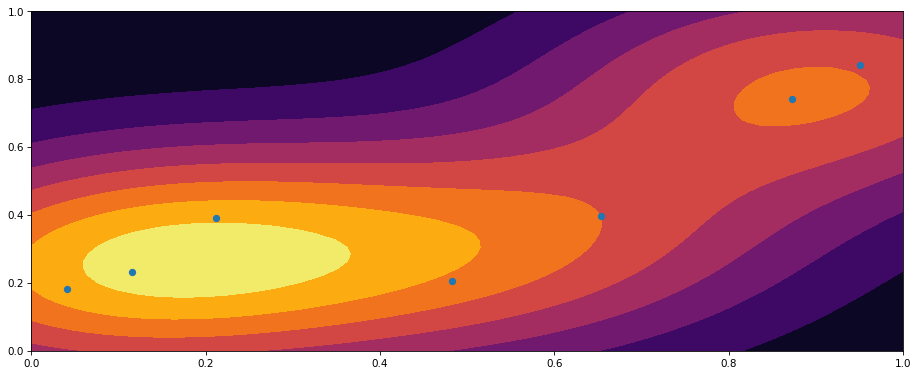

In [3]:
from matplotlib import pyplot
pyplot.rc("figure", figsize=[15, 6], dpi=75)

xloc, yloc = numpy.mgrid[0:1:50j, 0:1:50j]
density = distribution.pdf([xloc, yloc])
pyplot.contourf(xloc, yloc, density)
pyplot.scatter(*samples)

pyplot.show()

### Data Driven PCE

With the KDE created, it is possible to create orthogonal polynomial chaos expansions directly:

In [4]:
# NBVAL_CHECK_OUTPUT
distribution = chaospy.GaussianKDE(samples)
expansion = chaospy.generate_expansion(1, distribution, rule="cholesky")

expansion.round(4)

polynomial([1.0, q1-0.428, -0.7841*q1+q0-0.1396])

The distribution also supports generation of samples. For example:

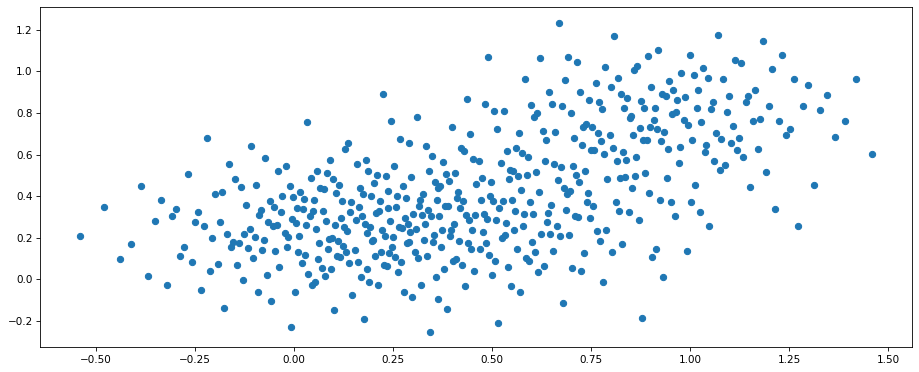

In [5]:
pseudo_samples = distribution.sample(500, rule="halton")

pyplot.scatter(*pseudo_samples)
pyplot.show()

This can then be used to create a model approximation using Point Collocation Method.

### Smoothing thorugh Bandwidth

In one dimension the kernel density is determined by a bandwidth parameter.
As kernel density estimation in `chaospy` is multivariate, the bandwidth parameter is instead defined through an H-matrix. However, it is possible to provide bandwidth as well, by just squaring the value. For example:

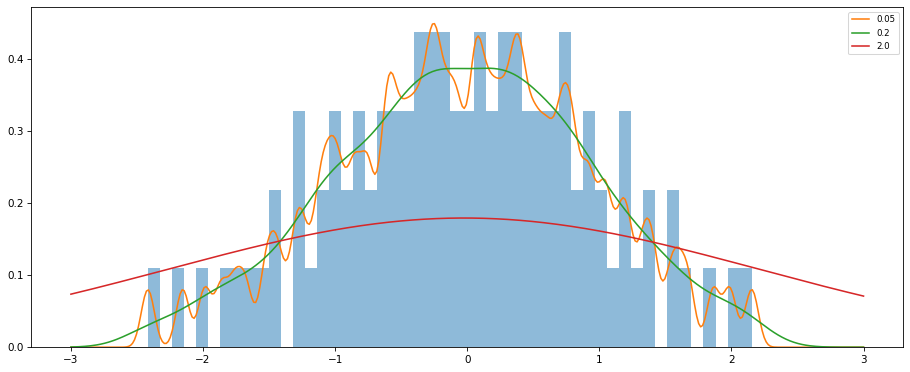

In [6]:
samples_1d = chaospy.Normal().sample(100, rule="halton")

pyplot.hist(samples_1d, bins=50, density=True, alpha=0.5)

t = numpy.linspace(-3, 3, 400)
distribution = chaospy.GaussianKDE(samples_1d, h_mat=0.05**2)
pyplot.plot(t, distribution.pdf(t), label="0.05")

distribution = chaospy.GaussianKDE(samples_1d, h_mat=0.2**2)
pyplot.plot(t, distribution.pdf(t), label="0.2")

distribution = chaospy.GaussianKDE(samples_1d, h_mat=2**2)
pyplot.plot(t, distribution.pdf(t), label="2.0")

pyplot.legend()
pyplot.show()

It is possible to provide the bandwidth in the multivariate case as well. If it is provided as a scalar, it will assume that all dimensions are handled equally (as in no anisotropy) and no internal correlation for each sample.

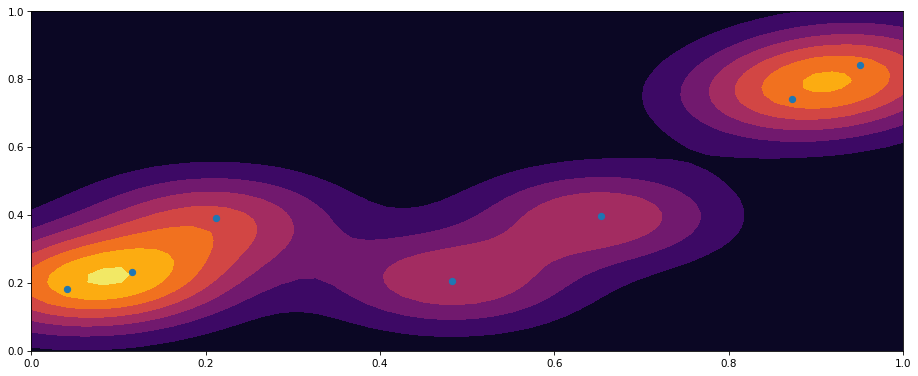

In [7]:
distribution = chaospy.GaussianKDE(samples, h_mat=0.1**2)
pyplot.contourf(xloc, yloc, distribution.pdf([xloc, yloc]))
pyplot.scatter(*samples)
pyplot.show()

### Anisotropic Smoothing

In the multivariate case, it is also possible to provide different smoothing parameters for the different dimensions, creating an anisotropic effect:

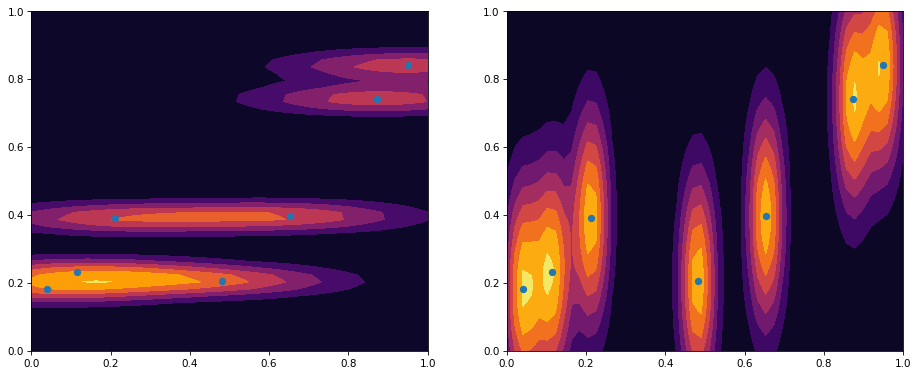

In [8]:
pyplot.subplot(121)
distribution = chaospy.GaussianKDE(samples, h_mat=[0.05, 0.001])
pyplot.contourf(xloc, yloc, distribution.pdf([xloc, yloc]))
pyplot.scatter(*samples)

pyplot.subplot(122)
distribution = chaospy.GaussianKDE(samples, h_mat=[0.001, 0.05])
pyplot.contourf(xloc, yloc, distribution.pdf([xloc, yloc]))
pyplot.scatter(*samples)

pyplot.show()

### Full F-style H-matrix

It is also possible to define `h_mat` to be a full correlation matrix applied to each sample. For example:

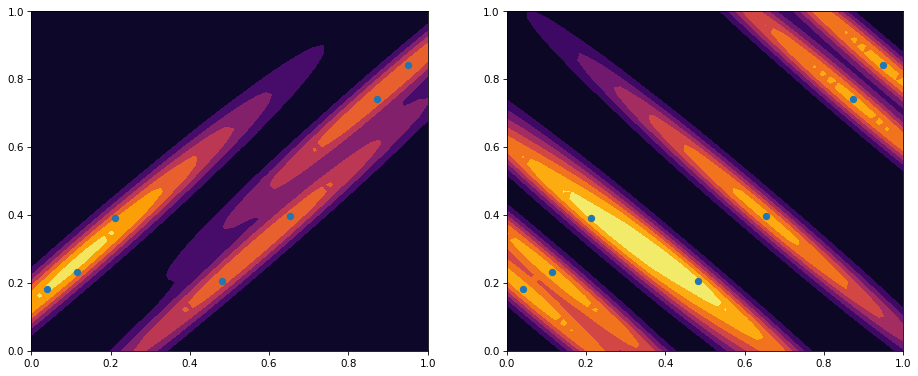

In [9]:
pyplot.subplot(121)
distribution = chaospy.GaussianKDE(
    samples, h_mat=[[0.1, 0.099], [0.099, 0.1]])
pyplot.contourf(xloc, yloc, distribution.pdf([xloc, yloc]))
pyplot.scatter(*samples)

pyplot.subplot(122)
distribution = chaospy.GaussianKDE(
    samples, h_mat=[[0.1, -0.099], [-0.099, 0.1]])
pyplot.contourf(xloc, yloc, distribution.pdf([xloc, yloc]))
pyplot.scatter(*samples)

pyplot.show()